In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score, confusion_matrix

In [ ]:
Bit = pd.read_csv('BTC-Daily.csv',usecols=['date','open','high','low','close','Volume USD'])
Bit.head()


,date,open,high,low,close,Volume USD
0,2022-03-01 00:00:00,43221.71,43626.49,43185.48,43185.48,2.116360e+06
1,2022-02-28 00:00:00,37717.10,44256.08,37468.99,43178.98,1.364723e+08
2,2022-02-27 00:00:00,39146.66,39886.92,37015.74,37712.68,6.418008e+07
3,2022-02-26 00:00:00,39242.64,40330.99,38600.00,39146.66,3.573010e+07
4,2022-02-25 00:00:00,38360.93,39727.97,38027.61,39231.64,8.642149e+07


In [ ]:
Bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2651 non-null   object 
 1   open        2651 non-null   float64
 2   high        2651 non-null   float64
 3   low         2651 non-null   float64
 4   close       2651 non-null   float64
 5   Volume USD  2651 non-null   float64
dtypes: float64(5), object(1)
memory usage: 124.4+ KB


In [ ]:
# Converting to datetime datatype
Bit['date'] = pd.to_datetime(Bit['date'])

In [ ]:
Bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   open        2651 non-null   float64       
 2   high        2651 non-null   float64       
 3   low         2651 non-null   float64       
 4   close       2651 non-null   float64       
 5   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 124.4 KB


In [ ]:
Bit.shape

(2651, 6)

In [ ]:
# Check for null values
Bit.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume USD    0
dtype: int64

In [ ]:
Bit.describe()

,date,open,high,low,close,Volume USD
count,2651,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03
mean,2018-07-15 00:00:00,11693.189332,12038.562912,11296.539461,11709.326213,6.099369e+07
min,2014-11-28 00:00:00,162.000000,212.840000,152.400000,162.000000,0.000000e+00
25%,2016-09-20 12:00:00,654.680000,664.460000,640.050000,654.370000,9.516170e+03
50%,2018-07-15 00:00:00,6408.950000,6540.000000,6312.000000,6407.770000,2.288982e+07
75%,2020-05-07 12:00:00,10708.620000,10956.240000,10303.755000,10726.425000,8.018383e+07
max,2022-03-01 00:00:00,67547.490000,69000.000000,66250.000000,67559.000000,1.446125e+09
std,NaN,16272.554746,16739.237000,15718.297511,16282.908704,1.072838e+08


In [ ]:
Bit.duplicated().sum()

0

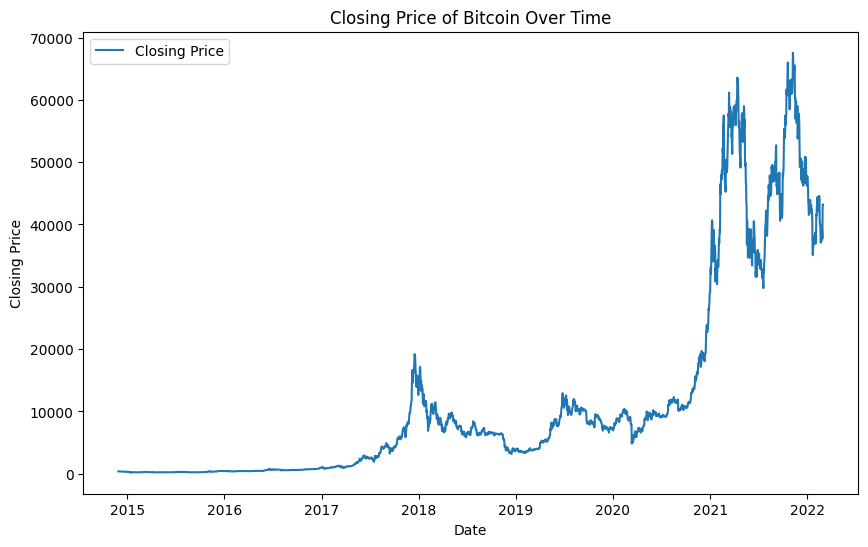

In [192]:
# Plot closing price of Bitcoin vs. year
plt.figure(figsize=(10, 6))
plt.plot(Bit['date'], Bit['close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price of Bitcoin Over Time')
plt.legend()
plt.show()


<Axes: ylabel='close'>

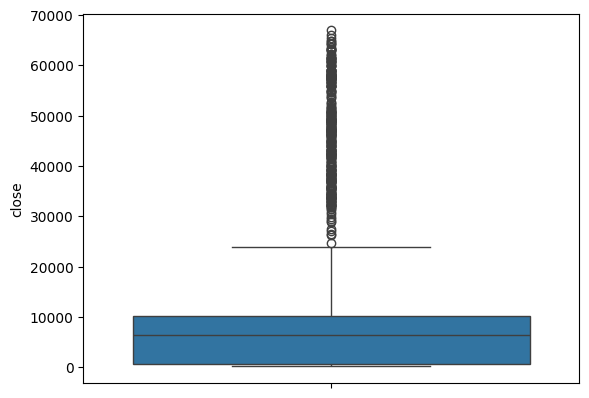

In [ ]:
sns.boxplot(df['close'])

<ipython-input-166-95b9791e92de>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-166-95b9791e92de>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-166-95b9791e92de>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the

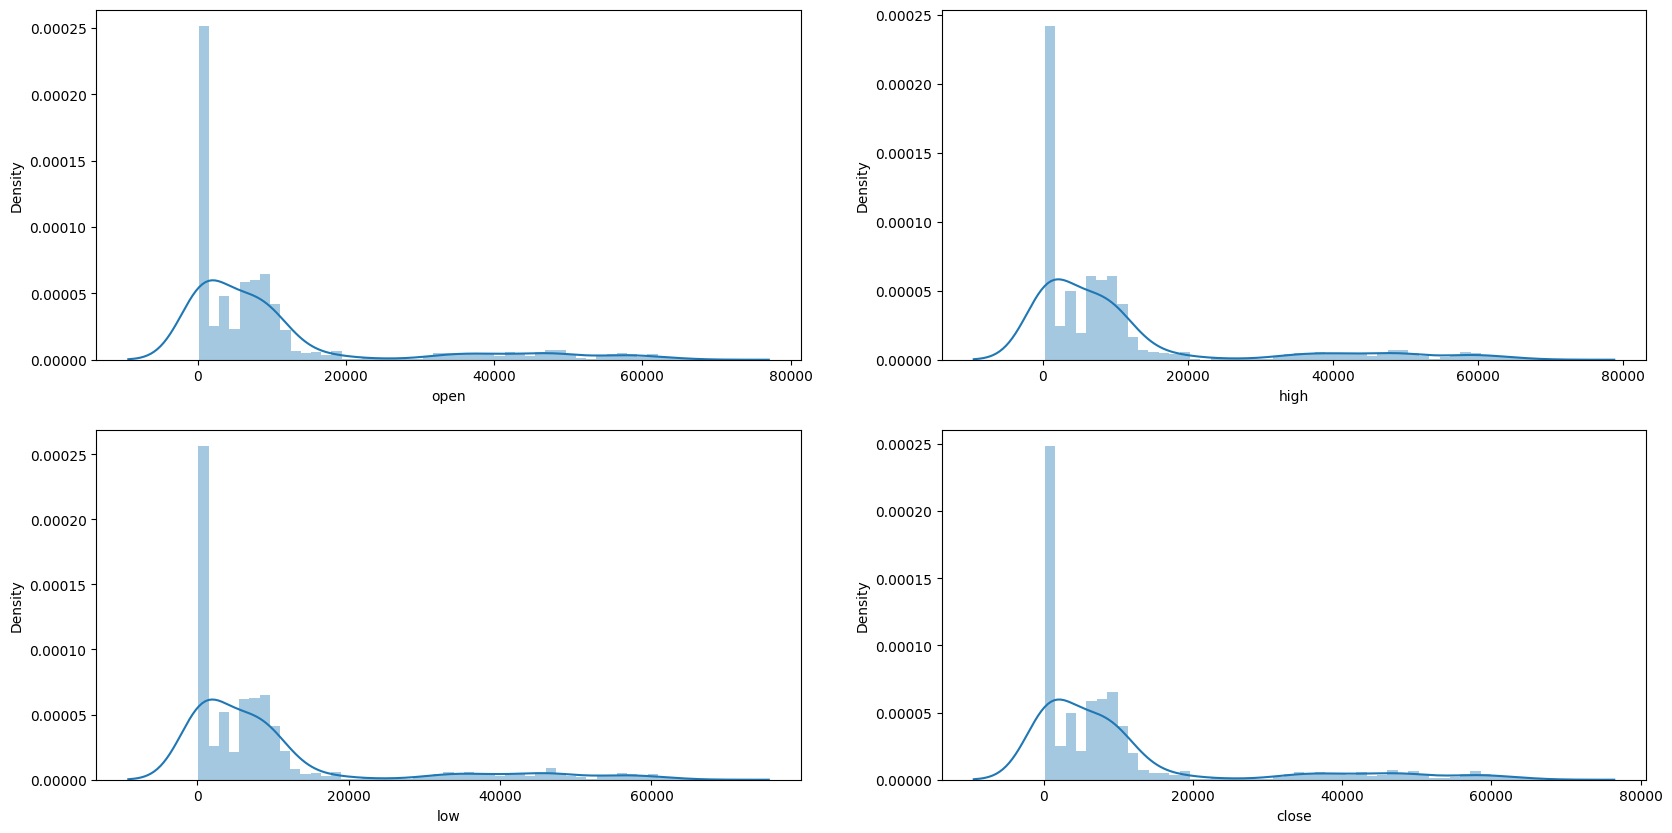

In [ ]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sns.distplot(df[col])
plt.show()


<ipython-input-167-4c50b8cc0f31>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


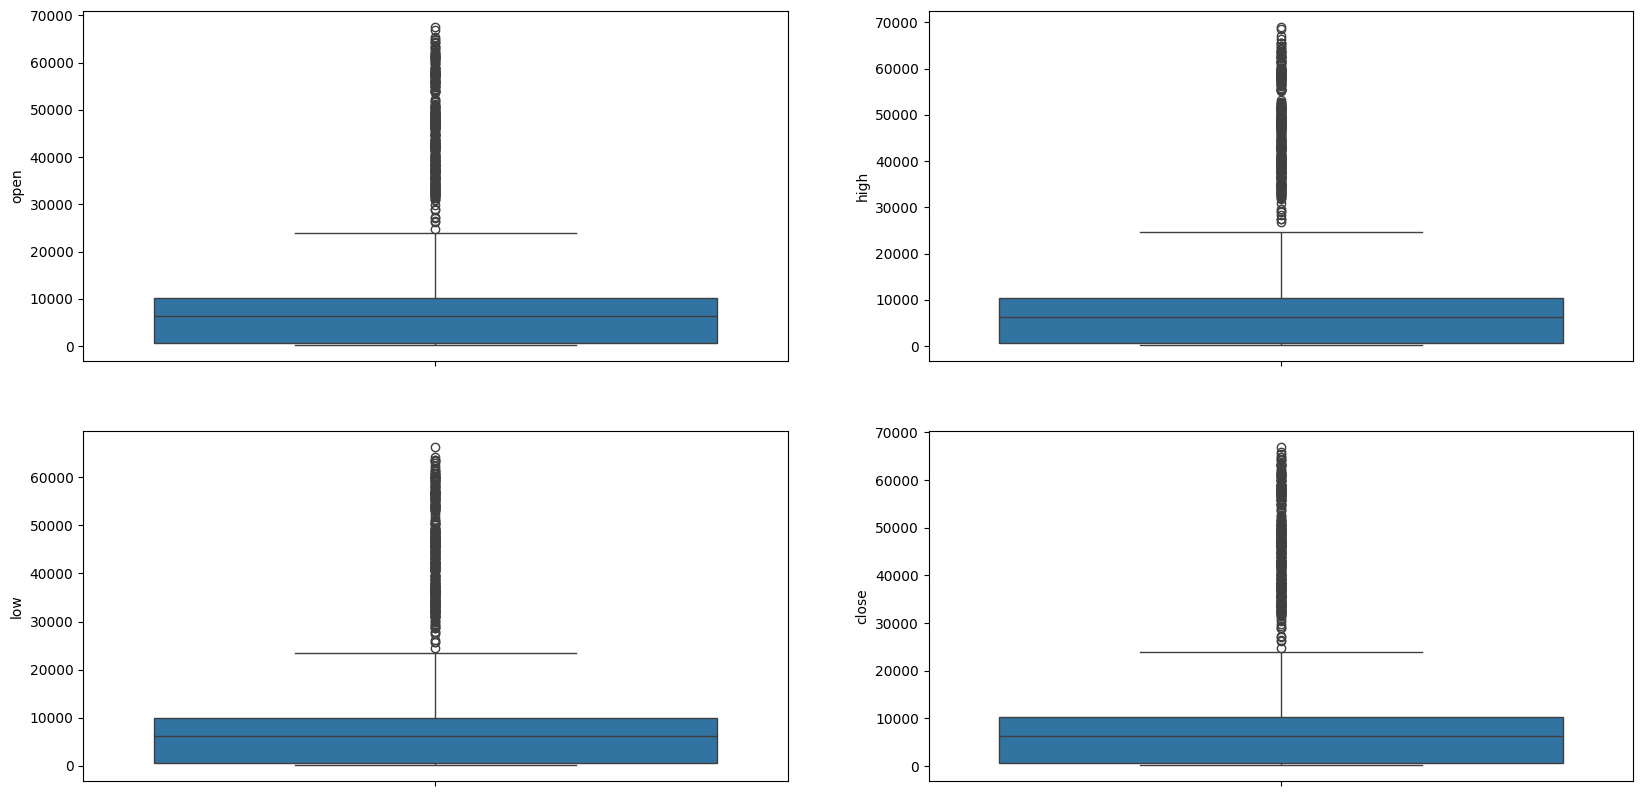

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sns.boxplot(df[col])
plt.show()


In [ ]:
Bit['year'] = Bit['date'].dt.year
Bit['month'] = Bit['date'].dt.month
Bit['day'] = Bit['date'].dt.day
Bit.sample(5)



,date,open,high,low,close,Volume USD,year,month,day
1220,2018-10-28,6407.66,6420.00,6383.00,6405.57,5.376180e+06,2018,10,28
113,2021-11-08,63300.00,67803.55,63300.00,67559.00,1.834513e+08,2021,11,8
596,2020-07-13,9304.94,9351.17,9190.49,9233.10,3.577986e+07,2020,7,13
463,2020-11-23,18432.60,18786.31,18001.95,18383.35,1.730257e+08,2020,11,23
1374,2018-05-27,7335.99,7412.57,7213.09,7347.39,2.310351e+07,2018,5,27


<ipython-input-169-c96d471eb525>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


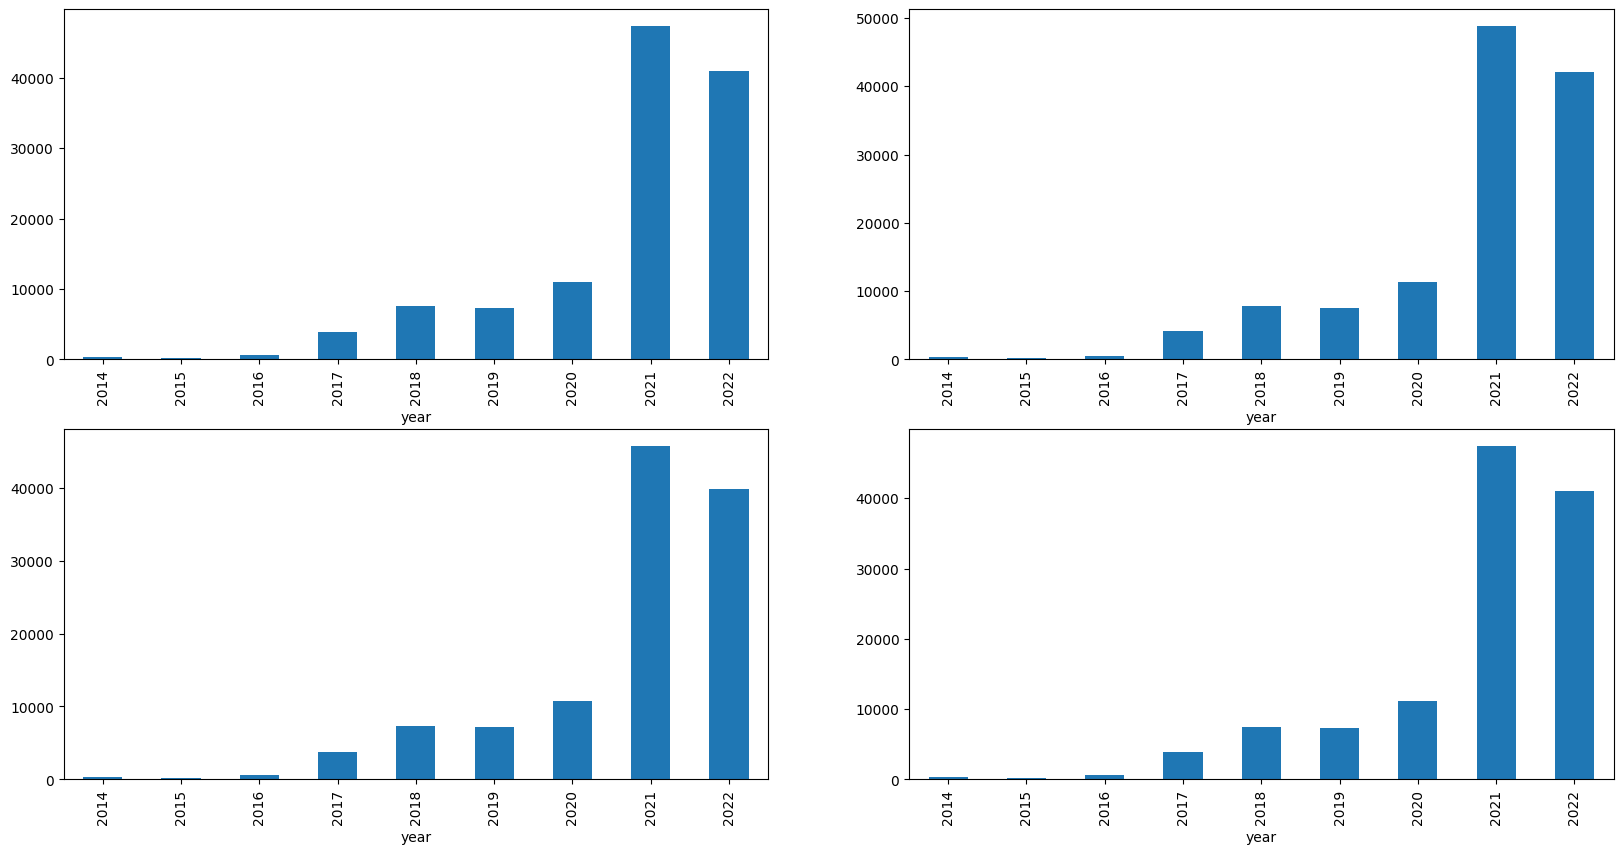

In [ ]:
data_grouped = Bit.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()


In [ ]:
Bit['is_quarter_end'] = np.where(Bit['month']%3==0,1,0)
Bit.head()


,date,open,high,low,close,Volume USD,year,month,day,is_quarter_end
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,2.116360e+06,2022,3,1,1
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,1.364723e+08,2022,2,28,0
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,6.418008e+07,2022,2,27,0
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,3.573010e+07,2022,2,26,0
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,8.642149e+07,2022,2,25,0


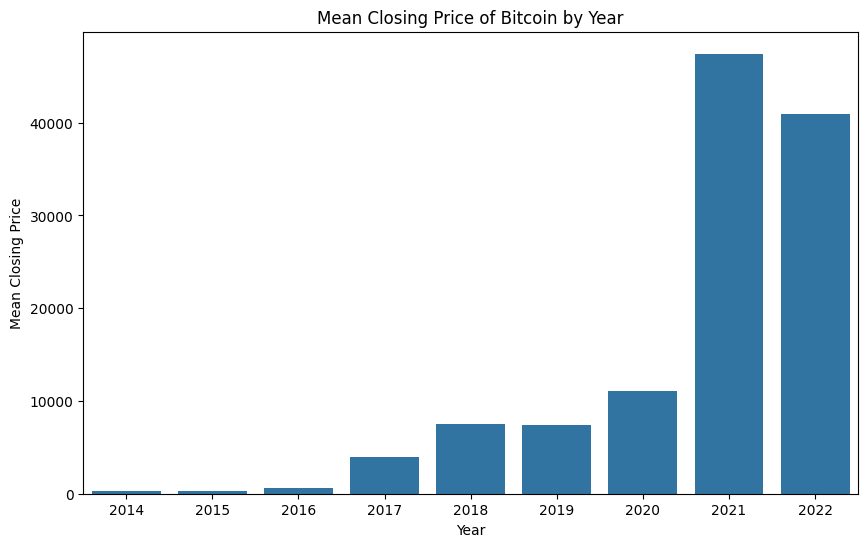

In [ ]:
# Barplot of mean price of Bitcoin vs. year
mean_price_per_year = Bit.groupby('year')['close'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='close', data=mean_price_per_year)
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.title('Mean Closing Price of Bitcoin by Year')
plt.show()

In [ ]:
# Feature engineering: Adding new features
Bit['Price_Change'] = Bit['close'] - Bit['open']
Bit['High_Low_Spread'] = Bit['high'] - Bit['low']


## Outliers



<ipython-input-193-ed7d04d119b6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-193-ed7d04d119b6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bit[col])
<ipython-input-193-ed7d04d119b6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

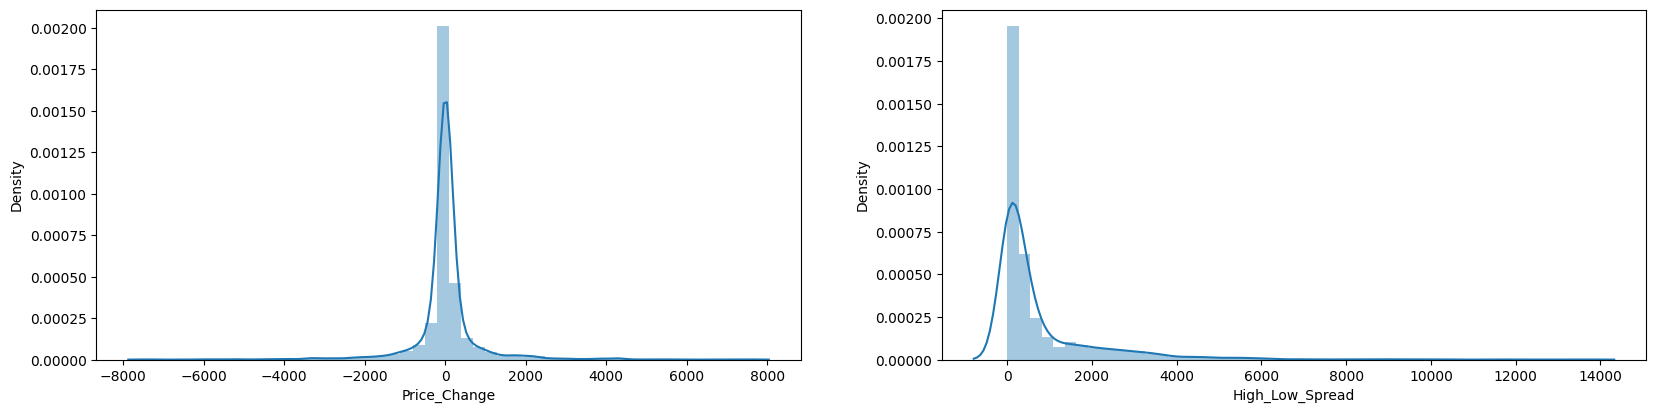

In [193]:
features = ['Price_Change','High_Low_Spread']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sns.distplot(Bit[col])
plt.show()

<Axes: ylabel='Price_Change'>

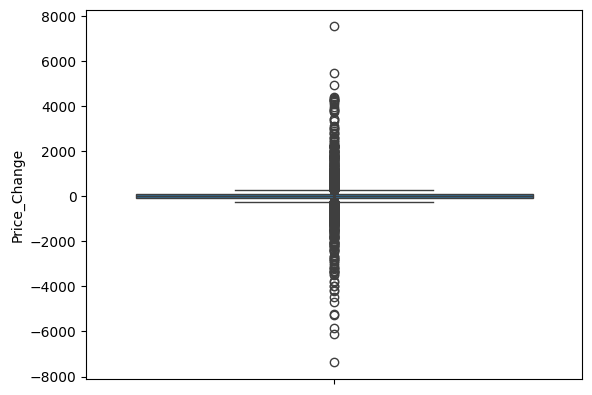

In [194]:
sns.boxplot(Bit['Price_Change'])

In [ ]:
upper_limit = Bit['Price_Change'].mean() + 3*Bit['Price_Change'].std()
lower_limit = Bit['Price_Change'].mean() - 3*Bit['Price_Change'].std()
upper_limit,lower_limit

(2410.98534245875, -2378.7115816137857)

In [ ]:
newdf=Bit.copy()
newdf['Price_Change'] = np.where(
newdf['Price_Change']>upper_limit,
    upper_limit,
    np.where(
        newdf['Price_Change']<lower_limit,
        lower_limit,
        newdf['Price_Change']
    )
)


In [ ]:
newdf.shape

(2651, 12)

<Axes: ylabel='Price_Change'>

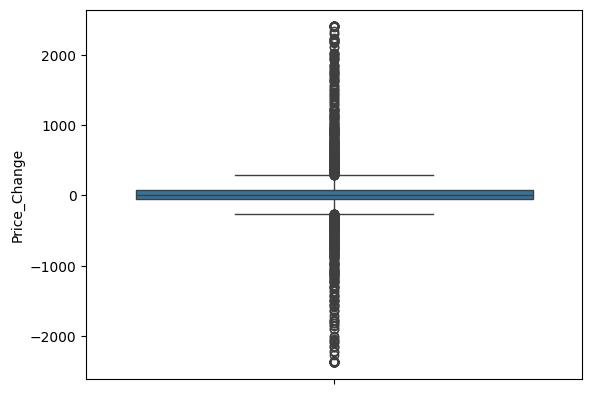

In [ ]:
sns.boxplot(newdf['Price_Change'])

<Axes: ylabel='High_Low_Spread'>

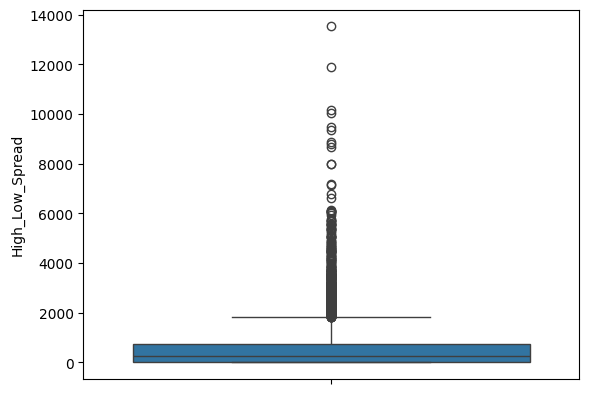

In [ ]:
sns.boxplot(newdf['High_Low_Spread'])

In [ ]:
# Finding the IQR
percentile25 = newdf['High_Low_Spread'].quantile(0.25)
percentile75 = newdf['High_Low_Spread'].quantile(0.75)

In [ ]:
percentile75
iqr = percentile75 - percentile25
iqr

721.0700000000002

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1825.7000000000005
Lower limit -1058.5800000000002


In [ ]:
df = newdf.copy()

df['High_Low_Spread'] = np.where(
    df['High_Low_Spread'] > upper_limit,
    upper_limit,
    np.where(
        df['High_Low_Spread'] < lower_limit,
        lower_limit,
       df['High_Low_Spread']
    )
)

In [ ]:
df.shape

(2651, 12)

<Axes: ylabel='High_Low_Spread'>

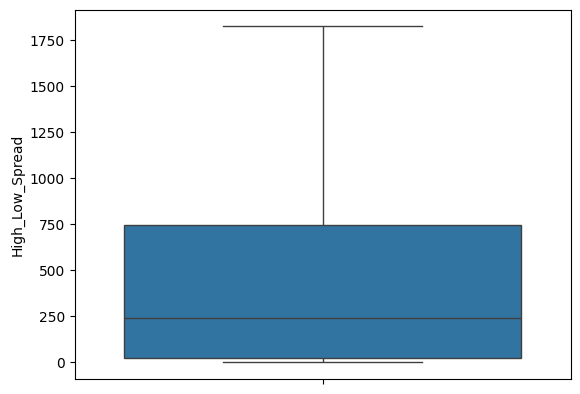

In [ ]:
sns.boxplot(df['High_Low_Spread'])

Price change is normalized distribution so we apply z score method to remove outliers while high_low_spread is skewed data so we apply IQR

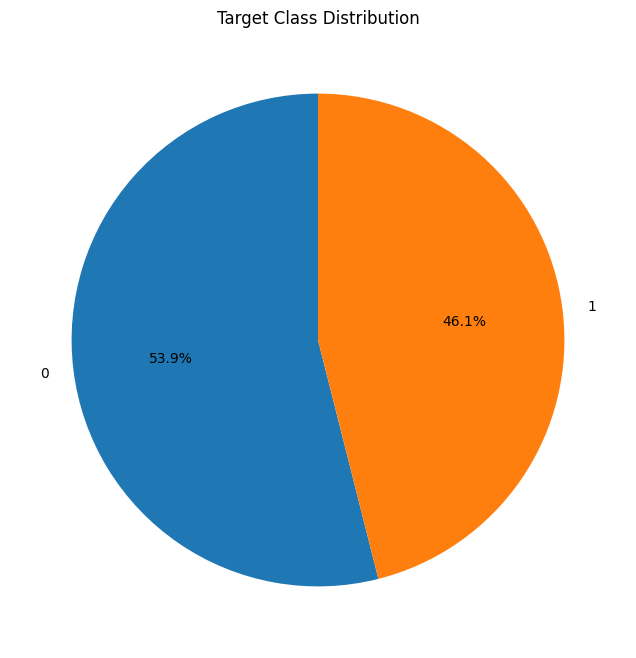

In [ ]:
# Pie chart to check target balance (assuming a binary classification problem)
df['Target'] = (df['close'].shift(-1) > df['close']).astype(int)  # 1 if price increased, 0 if decreased
target_counts = df['Target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Class Distribution')
plt.show()

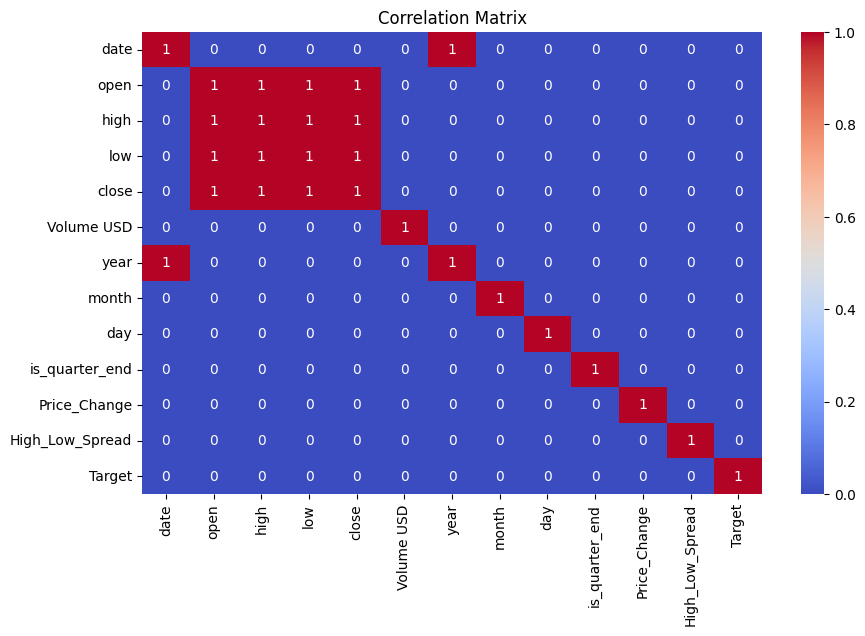

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()>0.9, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Prepare the data
features = ['Price_Change', 'High_Low_Spread','is_quarter_end']
X = df[features].dropna()
y = df['Target'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)


In [ ]:
# Initialize models
models = [
    LogisticRegression(max_iter=10000),
    SVC(kernel='poly', probability=True),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

# Train, evaluate, and use predict for each model
for model in models:
    model.fit(X_train, y_train)

    # Evaluate the model
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f'{model.__class__.__name__} :')
    print('Training ROC AUC: ', train_roc_auc)
    print('Validation ROC AUC: ', valid_roc_auc)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print('Accuracy: ', accuracy)
    print('Confusion Matrix:\n', conf_matrix)
    print('Classification Report:\n', class_report)
    print()


LogisticRegression :
Training ROC AUC:  0.9937244878324692
Validation ROC AUC:  0.9957187857961053
Accuracy:  0.8851224105461394
Confusion Matrix:
 [[291   0]
 [ 61 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       291
           1       1.00      0.75      0.85       240

    accuracy                           0.89       531
   macro avg       0.91      0.87      0.88       531
weighted avg       0.91      0.89      0.88       531


SVC :
Training ROC AUC:  0.9624301589730785
Validation ROC AUC:  0.9641466208476518
Accuracy:  0.8041431261770244
Confusion Matrix:
 [[289   2]
 [102 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       291
           1       0.99      0.57      0.73       240

    accuracy                           0.80       531
   macro avg       0.86      0.78      0.79       531
weighted avg       0.85  

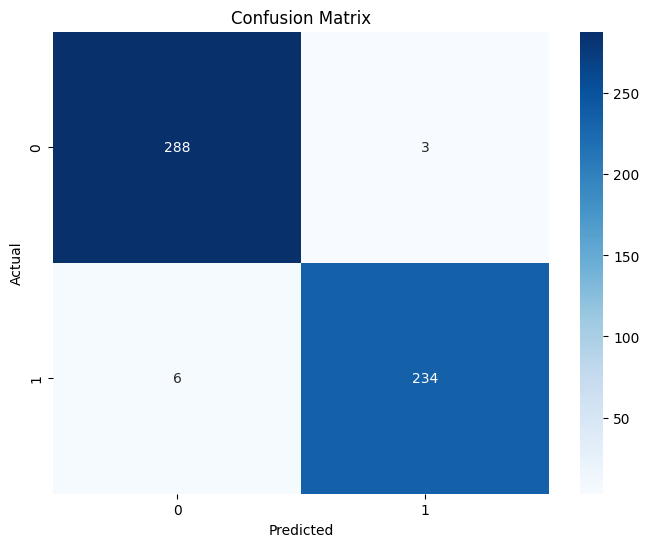

In [ ]:
# Visualization of the confusion matrix for the last model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()